In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import seaborn as sns; sns.set()
from matplotlib import dates
import altair as alt
import math
from astropy.time import Time
import pyupset as pyu

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
plt.style.use('seaborn-dark-palette')

In [2]:
jedi = pd.read_csv('jedi_v1_og.csv', low_memory=False)
jedi_demon = pd.read_csv('Jedi_Demon_Additional_Data.csv', low_memory=False)
jedi_demon_events = pd.read_csv('Jedi_Demon_Events.csv', )

In [3]:
jedi_demon_events.head()

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Time to Peak In Sec,Flare Class Converted,17.1 Depth [%],17.7 Depth [%],18.0 Depth [%],19.5 Depth [%],20.2 Depth [%],...,Jedi Intensity 28.4,Jedi Intensity Quad,Has DEMON Dimming,Intensity,Max Drop,Demon Event #,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Off-Limb Percent,Is Off-Limb
0,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,1620.0,2000,0.420038,0.672652,NaN,NaN,NaN,...,NaN,0.000049,True,-98.0,84.0,4324.0,0.010658,0.000173,1.593318,False
1,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,900.0,610,0.235694,NaN,NaN,NaN,NaN,...,NaN,0.000015,True,-61.0,104.0,4325.0,0.004628,0.000008,0.177313,False
2,12.0,2010-06-13 05:30:00.000,2010-06-13 05:39:00.000,540.0,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-370.0,376.0,4326.0,0.000288,0.027543,98.966030,True
3,19.0,2010-06-14 00:44:00.000,2010-06-14 00:51:00.000,420.0,150,NaN,NaN,NaN,NaN,1.570911,...,NaN,0.000040,True,-86.0,215.0,4327.0,0.000501,0.006511,92.848768,True
4,21.0,2010-07-09 08:53:00.000,2010-07-09 09:01:00.000,480.0,180,0.570929,0.555022,NaN,NaN,NaN,...,NaN,0.000053,True,-10.0,6.0,4334.0,0.000008,0.000536,98.484779,True


# Looking at Off-limb Percent and events
below we are going to look at events that occur off-limb, and see if jedi sees anything different in the off-limb compared to on.

In [4]:
#grabbing just the off-limb events(where 75% of the size of the dimming comes from off-limb),
#and putting them into a sub catalogue.
jedi_demon_events_copy = jedi_demon_events.copy()
jedi_demon_events_off_limb = jedi_demon_events_copy[jedi_demon_events_copy['Is Off-Limb'] != False]
plt.style.use('seaborn-darkgrid')

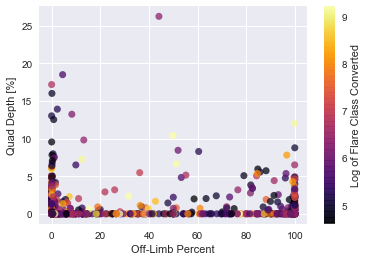

In [5]:
plt.scatter(jedi_demon_events.loc[:, 'Off-Limb Percent'], jedi_demon_events.loc[:, 'Quad Depth [%]'],
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.xlabel('Off-Limb Percent');
plt.ylabel('Quad Depth [%]');
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)


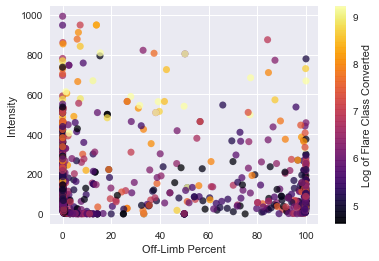

In [6]:
plt.scatter(jedi_demon_events.loc[:, 'Off-Limb Percent'], np.abs(jedi_demon_events.loc[:, 'Intensity']),
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.xlabel('Off-Limb Percent');
plt.ylabel('Intensity');
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)

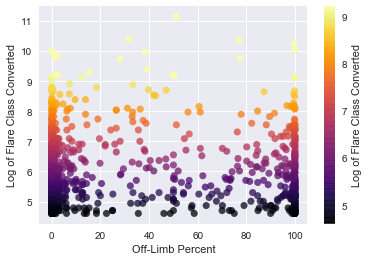

In [7]:
plt.scatter(jedi_demon_events.loc[:, 'Off-Limb Percent'], np.log(jedi_demon_events.loc[:, 'Flare Class Converted']),
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.xlabel('Off-Limb Percent');
plt.ylabel('Log of Flare Class Converted');
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)

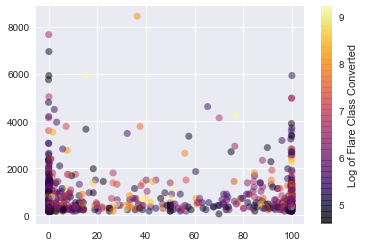

In [8]:
plt.scatter(jedi_demon_events.loc[:, 'Off-Limb Percent'], jedi_demon_events.loc[:, 'GOES Flare Time to Peak In Sec'],
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.6, 9.211)

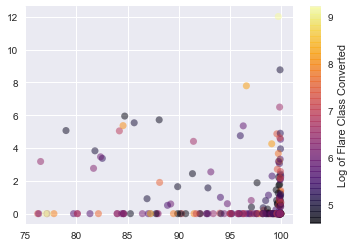

In [9]:
plt.scatter(jedi_demon_events_off_limb.loc[:, 'Off-Limb Percent'], jedi_demon_events_off_limb.loc[:, 'Quad Depth [%]'],
            c=np.log(jedi_demon_events_off_limb.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.6, 9.211)


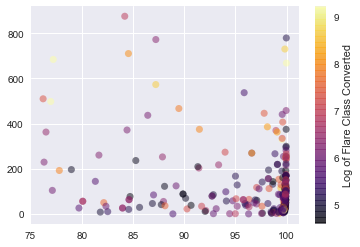

In [10]:
plt.scatter(jedi_demon_events_off_limb.loc[:, 'Off-Limb Percent'], np.abs(jedi_demon_events_off_limb.loc[:, 'Intensity']),
            c=np.log(jedi_demon_events_off_limb.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.6, 9.211)

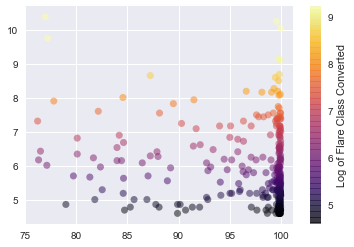

In [11]:
plt.scatter(jedi_demon_events_off_limb.loc[:, 'Off-Limb Percent'], np.log(jedi_demon_events_off_limb.loc[:, 'Flare Class Converted']),
            c=np.log(jedi_demon_events_off_limb.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.5,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.6, 9.211)

# Using PCA to Lower Dimensions


In [12]:
abs_intensity = jedi_demon_events['Intensity'].values
pca_sub = jedi_demon_events[['Quad Depth [%]', 'GOES Flare Time to Peak In Sec', 'Flare Class Converted',
                             'Jedi Intensity Quad']]

In [13]:
pca_sub.insert(4, 'Intensity', abs_intensity)

In [14]:
imp = Imputer(strategy='mean')
pca_sub_filled = imp.fit_transform(pca_sub)
pca_sub_filled_norm = normalize(pca_sub_filled)

model = PCA(n_components=3);
pca_sub_2d = model.fit_transform(pca_sub_filled_norm)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



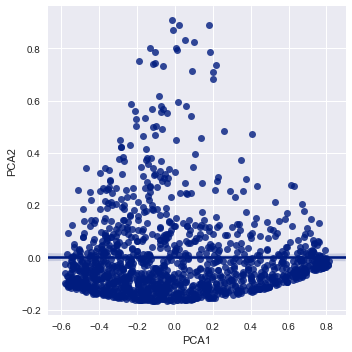

In [15]:
pca_sub['PCA1'] = pca_sub_2d[:, 0]
pca_sub['PCA2'] = pca_sub_2d[:, 1]
sns.lmplot("PCA1", "PCA2", data=pca_sub)

Text(0,0.5,'PCA 2')

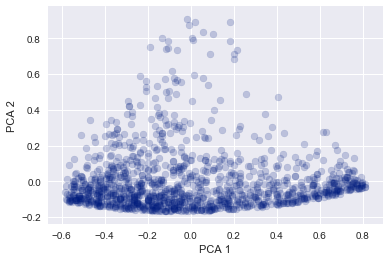

In [16]:
plt.scatter(pca_sub_2d[:, 0], pca_sub_2d[:, 1], alpha=.2)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

## Welp,looks like nothing super interesting came out of it. Lets try some K-Means clustering to see if we can group anything.
There is the small grouping of events near the top of the chip-shaped events

In [17]:
from sklearn.cluster import KMeans

from sklearn.cluster import SpectralClustering


(1258, 2)


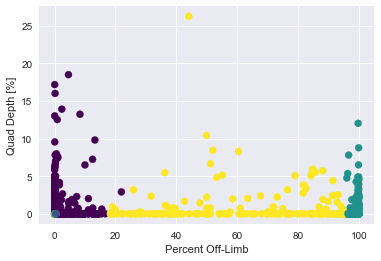

In [18]:
# kmeans = KMeans(n_clusters=10)
X = jedi_demon_events[['Off-Limb Percent', 'Quad Depth [%]']].copy()
X_nonan = X.dropna().values
print(X_nonan.shape)
# kmeans.fit(X_nonan)
# y_kmeans = kmeans.predict(X_nonan)

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_nonan)
plt.scatter(X_nonan[:, 0], X_nonan[:, 1], c=labels, s=50, cmap='viridis');


# plt.scatter(X_nonan[:, 0], X_nonan[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Percent Off-Limb');
plt.ylabel('Quad Depth [%]');

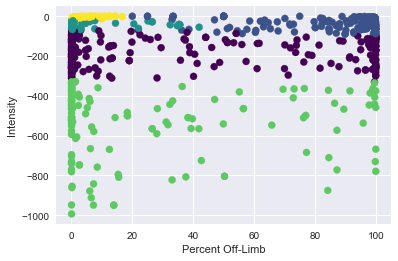

In [19]:
#kmeans = KMeans(n_clusters=4)
X = jedi_demon_events[['Off-Limb Percent', 'Intensity']].copy()
X_nonan = X.dropna().values
#print(X_nonan.shape)
#kmeans.fit(X_nonan)
#y_kmeans = kmeans.predict(X_nonan)

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_nonan)
plt.scatter(X_nonan[:, 0], X_nonan[:, 1], c=labels, s=50, cmap='viridis');


# plt.scatter(X_nonan[:, 0], X_nonan[:, 1], c=y_kmeans, s=50, cmap='viridis')
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.xlabel('Percent Off-Limb');
plt.ylabel('Intensity');

In [20]:
# kmeans = KMeans(n_clusters=10, init=50)
# X = jedi_demon[['Quad Depth', 'Intensity']].copy()
# X_nonan = X.dropna().values

# kmeans.fit(X_nonan)
# y_kmeans = kmeans.predict(X_nonan)

# # model = SpectralClustering(n_clusters=8, affinity='nearest_neighbors',
# #                            assign_labels='kmeans')
# # labels = model.fit_predict(X_nonan)
# # plt.scatter(X_nonan[:, 1], X_nonan[:, 0], c=labels, s=50, cmap='viridis');


# plt.scatter(X_nonan[:, 0], X_nonan[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# plt.xlabel('Quad Depth [%]');
# plt.ylabel('Intensity');

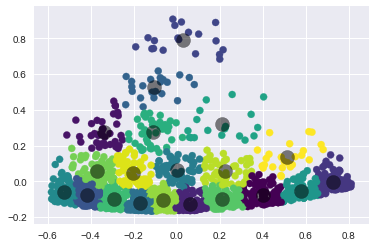

In [21]:
X = pca_sub_2d
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

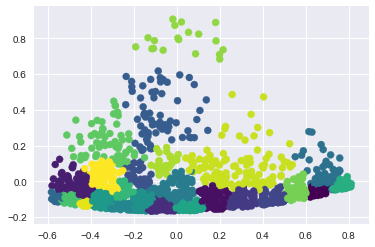

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=25, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');


## Nothing to interesting, wasn't expecting much.

## Looking at Max Drop

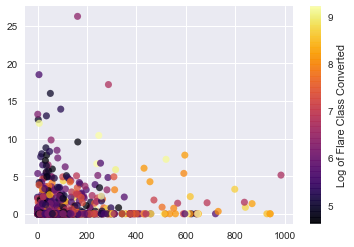

In [23]:
plt.scatter(jedi_demon_events.loc[:, 'Max Drop'], jedi_demon_events.loc[:, 'Quad Depth [%]'],
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



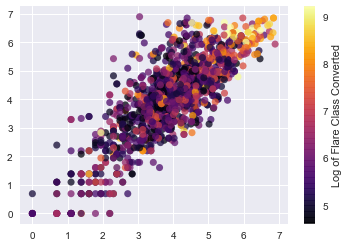

In [24]:
plt.scatter(np.log(jedi_demon_events.loc[:, 'Max Drop']), np.log(np.abs(jedi_demon_events.loc[:, 'Intensity'])),
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)
#expected as demon vs demon data always turns out nice.

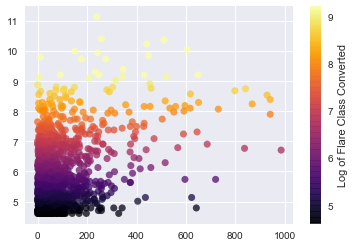

In [25]:
plt.scatter(jedi_demon_events.loc[:, 'Max Drop'],np.log(jedi_demon_events.loc[:, 'Flare Class Converted']),
            c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
            cmap=plt.cm.get_cmap('inferno', ), s=50)
plt.colorbar(label='Log of Flare Class Converted', ticks=range(12))
plt.clim(4.61, 9.211)

# Creating a Quad Duration [s]


In [26]:
def turnIntoSeconds_jedi_demon(timeArray):
    """Pass it an array of string values of time (EX:'2016-03-12 12:30:15'), and it will return a list of those time values converted into seconds."""
    secondArray = []
    
    for i in range(len (timeArray)):
        timeValue = timeArray[i]
        #print(timeArray)
        if timeValue != 0:
            hours = timeValue[11:13]
            #print(timeValue[11:13])
            minutes = timeValue[14:16]
            #print(minutes)
            seconds = timeValue[17:19]

            secondHours = round((float(hours) * 60 * 60))
            minuteHours = round((float(minutes) * 60))
            secondFloat = float(seconds)

            secondArray.append((secondHours + minuteHours + secondFloat))
        else:
            secondArray.append(0)
            
    return secondArray
            

In [27]:
def time_array_in_sec(depthPercent, depthTime):
    "gives you a array in seconds of all the events that are in the euv that was passed in"
    jedi_events_noNaN = jedi_demon_events.T.dropna(subset=(depthPercent, depthTime), how='any',axis=1)
    jedi_events_noNaN
    time_arr = jedi_events_noNaN.T.loc[:, depthTime].values
    time_list = turnIntoSeconds_jedi_demon(time_arr)
    time_array_nonan = np.array(time_list)

    return time_array_nonan, jedi_events_noNaN.T

In [28]:
def time_in_sec_jedi_demon_length(depthTime):
    euv_time = jedi_demon_events.filter(regex=depthTime).astype(str).values.flatten()
    
    for i in range(len(euv_time)):
        if euv_time[i] == 'nan':
            euv_time[i] = 0


    euv_time_sec = turnIntoSeconds_jedi_demon(euv_time)
    return euv_time_sec

In [29]:
euv171_sec = jedi_demon_events.loc[:, '17.1 Duration [s]']
euv177_sec = jedi_demon_events.loc[:, '17.7 Duration [s]']
euv180_sec = jedi_demon_events.loc[:, '18.0 Duration [s]']
euv195_sec = jedi_demon_events.loc[:, '19.5 Duration [s]']
euv202_sec = jedi_demon_events.loc[:, '20.2 Duration [s]']
euv211_sec = jedi_demon_events.loc[:, '21.1 Duration [s]']
euv284_sec = jedi_demon_events.loc[:, '28.4 Duration [s]']

In [30]:
def quad(euvOne, euvTwo, euvThree, euvFour, euvFive, euvSix, euvSeven):
    quad_list = []

    euv1 = euvOne.copy()
    euv2 = euvTwo.copy()
    euv3 = euvThree.copy()
    euv4 = euvFour.copy()
    euv5 = euvFive.copy()
    euv6 = euvSix.copy()
    euv7 = euvSeven.copy()
    
    for i in range(len(euv1)):
        if math.isnan(euv1[i]):
            euv1[i] = 0
        if math.isnan(euv2[i]):
            euv2[i] = 0
        if math.isnan(euv3[i]):
            euv3[i] = 0
        if math.isnan(euv4[i]):
            euv4[i] = 0
        if math.isnan(euv5[i]):
            euv5[i] = 0
        if math.isnan(euv6[i]):
            euv6[i] = 0
        if math.isnan(euv7[i]):
            euv7[i] = 0
       
        
    
    euv1Squared = euv1 ** 2
    euv2Squared = euv2 ** 2
    euv3Squared = euv3 ** 2
    euv4Squared = euv4 ** 2
    euv5Squared = euv5 ** 2
    euv6Squared = euv6 ** 2
    euv7Squared = euv7 ** 2
    
    for i in range(len(euv1Squared)):
        quad_list.append(math.sqrt((euv1Squared[i] + euv2Squared[i] + euv3Squared[i] + euv4Squared[i] + euv5Squared[i]
                                    + euv6Squared[i] + euv7Squared[i])))
    
    return quad_list
       

In [71]:
quad_time = quad(euv171_sec, euv177_sec, euv180_sec, euv195_sec, euv202_sec, euv211_sec, euv284_sec)

In [74]:
jedi_demon_events.insert(33, 'Quad Duration [s]', quad_time)

In [33]:
jedi_demon_events.iloc[23:26]

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Time to Peak In Sec,Flare Class Converted,17.1 Depth [%],17.7 Depth [%],18.0 Depth [%],19.5 Depth [%],20.2 Depth [%],...,Jedi Intensity 28.4,Jedi Intensity Quad,Has DEMON Dimming,Intensity,Max Drop,Demon Event #,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Off-Limb Percent,Is Off-Limb
23,112.0,2011-01-28 00:44:00.000,2011-01-28 01:03:00.000,1140.0,1300,NaN,NaN,NaN,NaN,0.027094,...,NaN,0.000002,True,-274.0,389.0,4419.0,0.001847,0.028931,93.999493,True
24,113.0,2011-01-28 04:02:00.000,2011-01-28 04:25:00.000,1380.0,150,0.728771,0.506934,NaN,0.204725,NaN,...,NaN,0.000070,True,-47.0,71.0,4420.0,0.000827,0.005489,86.903297,True
25,116.0,2011-02-08 21:06:00.000,2011-02-08 21:12:00.000,360.0,400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-134.0,207.0,4428.0,0.000008,0.004527,99.829113,True


In [34]:
jedi_demon_events_copy = jedi_demon_events.copy()

In [35]:
jedi_demon_events_copy.drop_duplicates(subset=('Event #'), inplace=True)

In [36]:
jedi_demon_events_copy;

In [37]:
event_nums = jedi_demon_events_copy[['Event #']].values

duplicate_event_num = []
for i in range(len(jedi_demon_events_copy)):
    for k in range(len(jedi_demon_events_copy)):
        if i != k and event_nums[i] == event_nums[k]:
            duplicate_event_num.append(i)
    

In [38]:
# events_for_james = []
# for i in range(len(duplicate_event_num)):
#     events_for_james.append(jedi_demon_events_copy.iloc[duplicate_event_num[i]][['Event #']].values)
    
# events_for_james

# dup_values = jedi_demon_events_copy.iloc[250:252][['Event #']].values
# dup0 = dup_values[:, 0] #becomes the completed event
# dup1 = dup_values[:, 1]
# dup_values
# dup_values = jedi_demon_events_copy.iloc[250:252].T.values
# dup0 = dup_values[:, 0] #becomes the completed event
# dup1 = dup_values[:, 1]
# filled_event = dup0.copy()

# for i in range(len(dup_values)):
#     if dup0[i] == np.nan and dup1[i] == np.nan:
#         filled_event[i] = np.nan
#     elif dup0[i] == np.nan:
#         filled_event[i] == dup1[i]
#     elif dup1[i] == np.nan:
#         filled_event[i] == dup0[i] 

In [39]:
just_depth = jedi_demon_events_copy.filter(like='Depth [%]')
just_depth.drop('Quad Depth [%]', axis=1, inplace=True)

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
just_depth_T = just_depth.T

In [41]:
for r in range(len(just_depth_T)):
    for c in range(len(just_depth_T.columns)):
        if just_depth_T.iloc[r, c] > 0:
            just_depth_T.iloc[r, c] = 1
        else:
            just_depth_T.iloc[r, c] = 0
#just_depth_T.to_csv('just_depth_T.csv', header=True, index=False, mode='w')

In [42]:
count_df = pd.DataFrame(just_depth.describe().loc['count']).T
count_dict = count_df.to_dict()
count_dict

dict_pyu = dict([('17.1 Depth [%]', 96), ('17.7 Depth [%]', 96), ('18.0 Depth [%]', 101),
                 ('19.5 Depth [%]', 101), ('20.2 Depth [%]', 89), ('21.1 Depth [%]', 86), ('28.4 Depth [%]', 65)])


In [43]:
#df.rename(index=str, columns={"A": "a", "B": "c"})
# just_depth.rename(index=str, columns={"17.1 Depth [%]": "Depth", "17.7 Depth [%]": "Depth", "18.0 Depth [%]": "Depth",
#                                       "19.5 Depth [%]": "Depth", "20.2 Depth [%]": "Depth", "21.1 Depth [%]": "Depth",
#                                       "28.4 Depth [%]": "Depth"}, inplace=True)

In [44]:
count = 0
sum_val_euv = just_depth_T.sum().values 
for i in range(len(sum_val_euv)):
    if sum_val_euv[i] == 7:
        count += 1
count

2

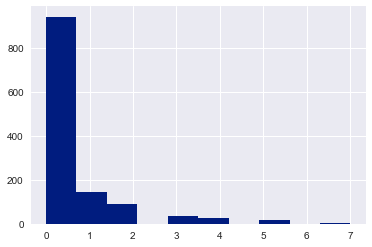

In [45]:
plt.hist(sum_val_euv);

In [46]:
just_depth.head()

,17.1 Depth [%],17.7 Depth [%],18.0 Depth [%],19.5 Depth [%],20.2 Depth [%],21.1 Depth [%],28.4 Depth [%]
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
just_depth_copy = just_depth.copy()

In [48]:
just_depth_copy[['17.1 Depth [%]']] *= 1000000
just_depth_copy[['17.7 Depth [%]']] *= 100000
just_depth_copy[['18.0 Depth [%]']] *= 10000
just_depth_copy[['19.5 Depth [%]']] *= 1000
just_depth_copy[['20.2 Depth [%]']] *= 100
just_depth_copy[['21.1 Depth [%]']] *= 10

In [49]:
unique_keys = just_depth_copy.T.sum().drop_duplicates().values
size = (len(unique_keys), 2)
vals = just_depth_copy.T.sum().values

In [50]:
freq_euv = np.zeros(size)
for i in range(len(freq_euv)):
    freq_euv[i, 0] = unique_keys[i]

for i in range(len(freq_euv)):
    for k in range(len(vals)):
        if freq_euv[i, 0] == vals[k]:
            freq_euv[i, 1] += 1

In [51]:
freq_euv_df = pd.DataFrame(freq_euv)
freq_euv_df.rename(index=str, columns={0: "EUV Combonations", 1: "Frequency"}, inplace=True)
freq_euv_df.sort_values(by='Frequency');

In [52]:
#plt.bar(np.log(freq_euv_df.values[:, 0]), freq_euv_df.values[:, 1], alpha=.35)
just_depth_copy.head()

,17.1 Depth [%],17.7 Depth [%],18.0 Depth [%],19.5 Depth [%],20.2 Depth [%],21.1 Depth [%],28.4 Depth [%]
0,1000000.0,100000.0,0.0,0.0,0.0,0.0,0.0
1,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,1000000.0,100000.0,0.0,0.0,0.0,0.0,0.0


In [53]:
all_euv_combos =dict([('Empty', 0.0), ('euv284', 1.0), ('euv211', 10.0), ('euv202', 100.0), ('euv195', 1000.0), ('euv211_195_180_177_171', 1111010.0), ('euv284_195_180_177_171', 1111001.0),
      ('euv180', 10000.0), ('euv177', 100000.0), ('euv171', 1000000.0), ('euv284_211', 11.0), ('euv284_202', 101.0), ('euv211_202_195_177_171', 1101110.0),
      ('euv284_195', 1001.0), ('euv284_180', 10001.0), ('euv284_177', 100001.0), ('euv284_171', 1000001.0), ('euv211_195_180_177', 111010.0),
      ('euv211_202', 110.0), ('euv211_195', 1010.0), ('euv211_180', 10010.0), ('euv211_177', 100010.0), ('euv202_177_171', 1100100.0), ('euv202_180_177', 110100.0),
      ('euv211_171', 1000010.0), ('euv202_195', 1100.0), ('euv202_180', 10100.0), ('euv202_177', 100100.0), ('euv211_177_171', 1100010.0),
      ('euv202_171', 1000100.0), ('euv195_180', 11000.0), ('euv195_177', 101000.0), ('euv195_171', 1001000.0), ('euv202_195_177_171', 1101100.0),
      ('euv180_177', 110000.0), ('euv180_171', 1010000.0), ('euv177_171', 1100000.0), ('euv284_211_202', 111.0), ('euv211_195_180', 11010.0), ('euv284_211_180_177', 110011.0),
      ('euv284_211_195', 1011.0), ('euv284_180_177', 110001.0), ('euv284_211_180', 10011.0), ('euv284_211_177', 100011.0), ('euv284_211_171', 1000011.0),
      ('euv211_202_195', 1110.0), ('euv211_202_180', 10110.0), ('euv211_202_177', 100110.0), ('euv211_202_171', 1000110.0), ('euv211_180_177_171', 1110010.0),
      ('euv202_195_180', 11100.0), ('euv202_195_177', 101100.0), ('euv202_195_171', 1001100.0), ('euv195_180_177', 111000.0), ('euv195_177_171', 1101000.0),
      ('euv195_180_171', 1011000.0), ('euv180_177_171', 1110000.0), ('euv202_195_171', 1001100.0), ('euv195_180_177', 111000.0), ('euv284_211_195_180', 11011.0),
      ('euv284_211_202_195', 1111.0), ('euv284_211_202_180', 10111.0), ('euv284_211_202_177', 100111.0), ('euv284_211_202_171', 1000111.0), ('euv284_202_195_180', 11101.0),
      ('euv211_202_195_180', 11110.0), ('euv211_202_195_177', 101110.0), ('euv211_202_195_171', 1001110.0), ('euv202_195_180_177', 111100.0), ('euv284_211_177_171', 1100011.0),
      ('euv202_195_180_171', 1011100.0), ('euv195_180_177_171', 1111000.0), ('euv284_211_202_195_180', 11111.0), ('euv284_211_202_195_177', 101111.0), ('euv211_202_177_171', 1100110.0),
      ('euv284_211_202_195_171', 1001111.0), ('euv211_202_195_180_177', 111110.0), ('euv211_202_195_180_171', 1011110.0), ('euv202_195_180_177_171', 1111100.0),
      ('euv284_211_202_195_180_177', 111111.0), ('euv284_211_202_195_180_171', 1011111.0), ('euv211_202_195_180_177_171', 1111110.0), ('euv284_211_202_195_180_177_171',1111111.0)])

In [54]:
res = {v:k for k,v in all_euv_combos.items()}


In [55]:
just_depth_sumDF = pd.DataFrame(just_depth_copy.T.sum())
just_depth_sumDF.insert(1, 'euv Wavelengths', np.nan)
just_depth_sumDF.rename(index=str, columns={0: 'euv_code'}, inplace=True)

for i in range(len(just_depth_sumDF)):
    just_depth_sumDF['euv Wavelengths'].iloc[i] = res[just_depth_sumDF['euv_code'].iloc[i]]

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
freq_euv_df.insert(1, 'Name of combinations', np.nan)

for i in range(len(freq_euv_df)):
    freq_euv_df['Name of combinations'].iloc[i] = res[freq_euv_df['EUV Combonations'].iloc[i]]

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [57]:
freq_euv_df.sort_values(by='Frequency', ascending=False, inplace=True)
freq_euv_df_copy = freq_euv_df.copy()
freq_euv_df;

In [58]:
freq_euv_df.sort_values(by='Frequency', ascending=False, inplace=True)
freq_euv_df_copy = freq_euv_df.copy()
freq_euv_df_copy.drop(freq_euv_df.index[17:], inplace=True)
freq_euv_df_copy.drop(freq_euv_df.index[:1], inplace=True)
freq_euv_df_copy

,EUV Combonations,Name of combinations,Frequency
6,1.0,euv284,34.0
13,10.0,euv211,33.0
1,1000000.0,euv171,27.0
3,100.0,euv202,19.0
16,1100.0,euv202_195,19.0
0,1100000.0,euv177_171,16.0
7,10000.0,euv180,14.0
36,1110000.0,euv180_177_171,13.0
4,1000.0,euv195,12.0
26,11000.0,euv195_180,11.0


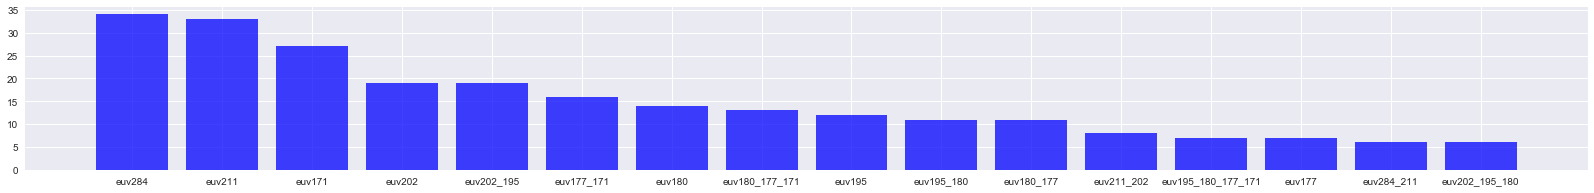

In [59]:
fig, ax = plt.subplots(figsize=(28,3))
ax.bar(freq_euv_df_copy['Name of combinations'], freq_euv_df_copy['Frequency'], color='blue', alpha=.75);
fig.savefig('Most_Frequent_Combinations.eps', format='eps', dpi=1200)

# Going Back to Jedi Demon catalogue
I want to go back and see if i can find any corralations between Jedi and Demon.

In [60]:
jedi_demon.head(40)

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Time to Peak In Sec,GOES Flare Class,Flare Class Converted,Pre-Flare Start Time,Quad Depth [%],Pre-Flare End Time,Flare Interrupt,...,103.2 by 102.6 Fitting Score,Has DEMON Dimming,Intensity,Max Drop,Demon Event #,Demon Flare,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Is Off-Limb,Off-Limb Percent
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,840.0,C3.6,360,2010-05-04 08:29:00.000,0.000000,2010-05-04 16:29:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,420.0,C2.3,230,2010-05-04 23:16:00.000,1.555291,2010-05-05 07:16:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,900.0,C8.8,880,2010-05-04 23:16:00.000,1.115836,2010-05-05 07:16:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,360.0,M1.2,1200,2010-05-04 23:16:00.000,1.833244,2010-05-05 07:16:00.000,False,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,780.0,C2.0,200,2010-05-06 23:42:00.000,0.000000,2010-05-07 07:42:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,480.0,C9.3,930,2010-05-07 20:59:00.000,0.000000,2010-05-08 04:59:00.000,True,...,0.073395,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,600.0,C1.8,180,2010-05-07 20:59:00.000,0.000000,2010-05-08 04:59:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,1620.0,M2.0,2000,2010-06-11 16:57:00.000,0.793027,2010-06-12 00:57:00.000,True,...,NaN,True,-98.0,84.0,4324.0,M4,0.010658,0.000173,False,1.593318
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,540.0,C1.0,100,2010-06-11 16:57:00.000,1.201989,2010-06-12 00:57:00.000,True,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,900.0,C6.1,610,2010-06-11 16:57:00.000,0.235694,2010-06-12 00:57:00.000,True,...,NaN,True,-61.0,104.0,4325.0,M2,0.004628,0.000008,False,0.177313


In [61]:
demon_dimming = jedi_demon.loc[:, 'Has DEMON Dimming'].values

demon_dimming_converted = []
for i in range(len(demon_dimming)):
    if demon_dimming[i] == 'False':
        
        demon_dimming_converted.append(1)
    else:
        demon_dimming_converted.append(0)
        
demon_dimming_converted = np.array(demon_dimming_converted)
demon_dimming

array(['False', 'False', 'False', ..., 'True', 'False', 'False'],
      dtype=object)

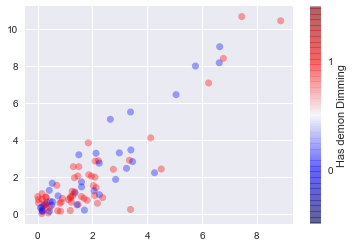

In [62]:
# plt.scatter(jedi_demon_events.loc[:, 'Off-Limb Percent'], np.abs(jedi_demon_events.loc[:, 'Intensity']),
#             c=np.log(jedi_demon_events.loc[:, 'Flare Class Converted'].values), edgecolor='none', alpha=.75,
#             cmap=plt.cm.get_cmap('inferno', ), s=50)

plt.scatter(jedi_demon.loc[:, '17.1 Depth [%]'], jedi_demon.loc[:, '18.0 Depth [%]'], cmap=plt.cm.get_cmap('seismic', ),
            c=demon_dimming_converted, edgecolor='none', alpha=.35, s=50)
#plt.xlabel('Quad Depth');
#plt.ylabel('Intensity');
plt.colorbar(label='Has demon Dimming', ticks=range(2))
plt.clim(-0.5, 1.5)

In [63]:
flare_conversion = {"A": 1, "B": 10, "C": 100, "M": 1000, "X":10000}
flareClass = jedi_demon.loc[:, 'Demon Flare'].values
flareClass.flatten()

array([nan, nan, nan, ..., 'B6', nan, nan], dtype=object)

In [64]:
flare_converted = []
tempBool = True
for k in range(len(flareClass)):
    tempBool = True
    for i, v in flare_conversion.items():
        tempString = flareClass[k]
        tempString = str(tempString)
        if tempString[:1] == i:
            flare_converted.append(round((float(tempString[1:]) * v)))
            tempBool = False
            
    if tempBool and math.isnan(float(tempString)) :
            flare_converted.append(np.nan)

In [65]:
flare_converted = np.array(flare_converted)

In [66]:
jedi_demon.insert(24322, 'Demon Flare Converted', flare_converted)

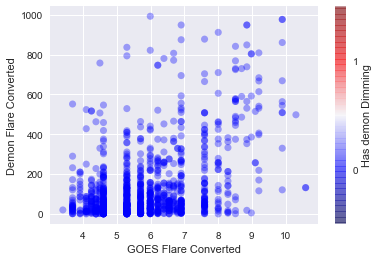

In [67]:
plt.scatter(np.log(jedi_demon.loc[:, 'Demon Flare Converted']), np.abs(jedi_demon.loc[:, 'Intensity']), cmap=plt.cm.get_cmap('seismic', ),
            c=demon_dimming_converted, edgecolor='none', alpha=.35, s=50)
plt.xlabel('GOES Flare Converted');
plt.ylabel('Demon Flare Converted');
plt.colorbar(label='Has demon Dimming', ticks=range(2))
plt.clim(-0.5, 1.5)

In [68]:
jedi_demon_events

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Time to Peak In Sec,Flare Class Converted,17.1 Depth [%],17.7 Depth [%],18.0 Depth [%],19.5 Depth [%],20.2 Depth [%],...,Jedi Intensity 28.4,Jedi Intensity Quad,Has DEMON Dimming,Intensity,Max Drop,Demon Event #,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Off-Limb Percent,Is Off-Limb
0,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,1620.0,2000,0.420038,0.672652,NaN,NaN,NaN,...,NaN,0.000049,True,-98.0,84.0,4324.0,0.010658,0.000173,1.593318,False
1,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,900.0,610,0.235694,NaN,NaN,NaN,NaN,...,NaN,0.000015,True,-61.0,104.0,4325.0,0.004628,0.000008,0.177313,False
2,12.0,2010-06-13 05:30:00.000,2010-06-13 05:39:00.000,540.0,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-370.0,376.0,4326.0,0.000288,0.027543,98.966030,True
3,19.0,2010-06-14 00:44:00.000,2010-06-14 00:51:00.000,420.0,150,NaN,NaN,NaN,NaN,1.570911,...,NaN,0.000040,True,-86.0,215.0,4327.0,0.000501,0.006511,92.848768,True
4,21.0,2010-07-09 08:53:00.000,2010-07-09 09:01:00.000,480.0,180,0.570929,0.555022,NaN,NaN,NaN,...,NaN,0.000053,True,-10.0,6.0,4334.0,0.000008,0.000536,98.484779,True
5,22.0,2010-07-09 19:26:00.000,2010-07-09 19:51:00.000,1500.0,340,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-85.0,111.0,4335.0,0.000008,0.006422,99.872020,True
6,26.0,2010-07-17 17:27:00.000,2010-07-17 18:01:00.000,2040.0,240,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-324.0,162.0,4338.0,0.012878,0.000008,0.063866,False
7,31.0,2010-08-05 20:39:00.000,2010-08-05 21:35:00.000,3360.0,130,NaN,NaN,NaN,0.225339,NaN,...,NaN,0.000008,True,-66.0,62.0,4348.0,0.002754,0.003746,57.629265,False
8,32.0,2010-08-07 17:55:00.000,2010-08-07 18:24:00.000,1740.0,1000,1.466233,NaN,NaN,NaN,NaN,...,NaN,0.000086,True,-861.0,686.0,4350.0,0.051104,0.000066,0.128006,False
9,37.0,2010-08-17 23:05:00.000,2010-08-18 00:01:00.000,3360.0,150,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,-44.0,26.0,4358.0,0.000008,0.006792,99.880012,True


In [69]:
1337 / 4533


0.29494815795279067

In [70]:
1337 /4597

0.29084185338264085